# Scene Text Detection with PixelLink

This notebook uses [PixelLink](https://github.com/ZJULearning/pixel_link) to detect text areas on a given image.

For other deep-learning Colab notebooks, visit [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks).


## Install PixelLink

In [0]:
import os
from os.path import exists, join, basename, splitext, abspath

git_repo_url = 'https://github.com/ZJULearning/pixel_link.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install
  !git clone -q $git_repo_url
  # make opencv3 compatible
  !sed -i 's/cv2.cv.BoxPoints/cv2.boxPoints/' $project_name/pixel_link.py
  # save output to output.png
  !sed -i 's/print util.sit(image_data)/print util.sit(image_data, format="bgr", path="\/content\/output.png")/' $project_name/test_pixel_link_on_any_image.py
  # submodule doesn't work, checkout manually
  !cd $project_name && rm -rf pylib && git clone -q https://github.com/dengdan/pylib.git && cd pylib && git checkout e749559
  os.environ['PYTHONPATH'] += ':' + join(abspath(project_name), 'pylib/src')
  #!cd $project_name && pip install -q -r requirements.txt
  
import sys
sys.path.append(project_name)
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

## Download pretrained model

In [0]:
def download_from_google_drive(file_id, file_name):
  # download a file from the Google Drive link
  !rm -f ./cookie
  !curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=$file_id" > /dev/null
  confirm_text = !awk '/download/ {print $NF}' ./cookie
  confirm_text = confirm_text[0]
  !curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=$confirm_text&id=$file_id" -o $file_name
  
pretrained_model = 'conv3_3'
if not exists(pretrained_model):
  # download the pretrained model
  pretrained_model_file_name = 'pixel_link_vgg_4s.zip'
  download_from_google_drive('19mlX5W8OBalSjhf5oTTS6qEq2eAU8Tg9', pretrained_model_file_name)
  !unzip $pretrained_model_file_name

## Detect scene text on a test image

First, dowload a test image from internet:

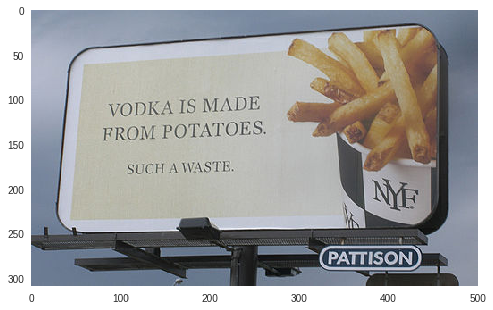

In [0]:
IMAGE_URL = 'https://raw.githubusercontent.com/tugstugi/dl-colab-notebooks/master/resources/billboard.jpg'


image_file_name = basename(IMAGE_URL)
download_dir = '/content/images'
!mkdir -p $download_dir && rm -rf $download_dir/*
!wget -q -P $download_dir $IMAGE_URL
  

plt.imshow(matplotlib.image.imread(join(download_dir, image_file_name)))

Run PixelLink on the above test image:

In [0]:
!cd $project_name && ./scripts/test_any.sh 0 ../conv3_3/model.ckpt-38055 $download_dir

Now, visualize the result:

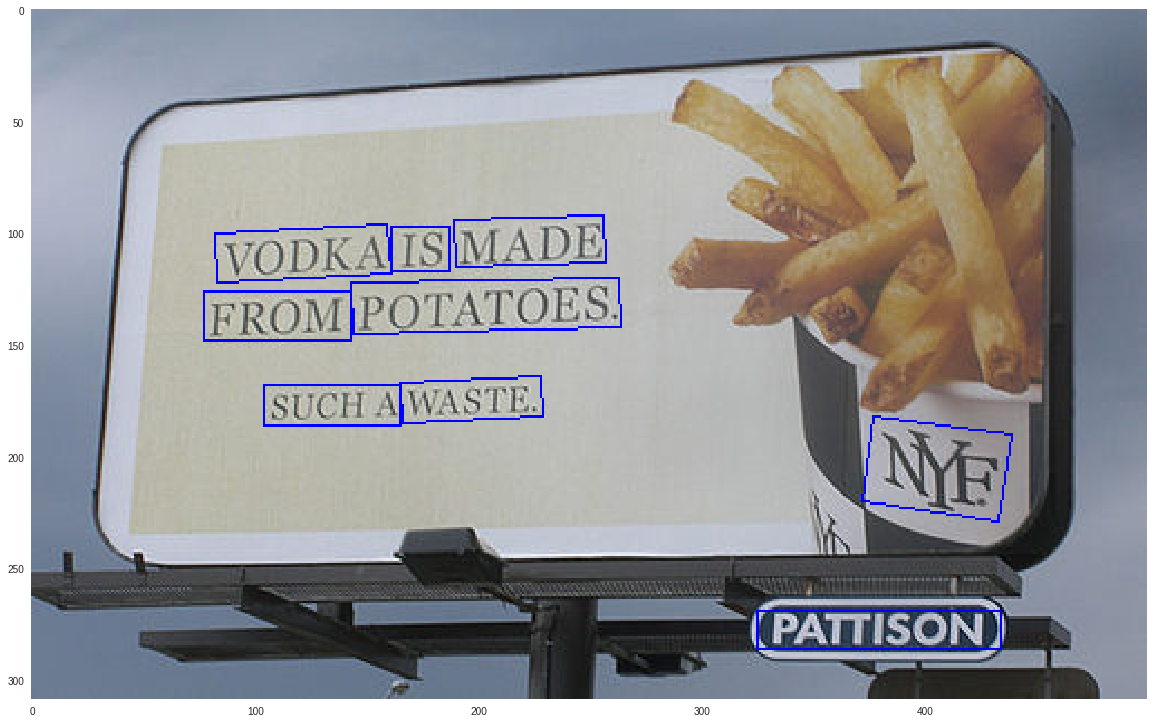

In [0]:
plt.figure(figsize=(20, 26))
plt.imshow(matplotlib.image.imread('output.png'))